# miniminiROCKET,  from scratch implementation with numpy

We reduce sizes of all variables and hiperparameters;

Features : PPV
Kernel Size : 7 with 5-2 proportion alpha=-2 beta=5  (example: (-2, -2, -2, 5, -2, 5, -2))
...

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm import tqdm

RANDOM_STATE = 786

In [2]:


def load_all_data_for_rocket(data_dir):
    """
    Carga todos los CSV del directorio
    
    Args:
        data_dir: Path o string con la ruta a la carpeta con los CSVs
        
    Returns:
        X: lista de arrays numpy (cada uno con longitud diferente)
        y: array numpy con las categorías ['a', 'b', 'c', 'd']
    """
    data_dir = Path(data_dir)
    csv_files = sorted(list(data_dir.glob('*.csv')))
    
    X = []  # lista de series temporales
    y = []  # lista de categorías
    
    for filepath in tqdm(csv_files, desc="Cargando archivos"):
        # Leer CSV
        df = pd.read_csv(filepath, header=None)
        df.columns = ['col_0', 'col_1', 'col_2']
        
        # Extraer SOLO serie temporal
        serie = df['col_0'][:100].values
        
        # Extraer categoría del nombre
        categoria = filepath.stem.split('_')[0]
        
        X.append(serie)
        y.append(categoria)
    
    # Convertir y a numpy array
    y = np.array(y)
    
    return X, y



In [3]:
# Uso:
X, y = load_all_data_for_rocket('data/')
print(f"Total series: {len(X)}")
print(f"Ejemplo shape primera serie: {X[0].shape}")
print(f"Categorías únicas: {np.unique(y)}")

Cargando archivos: 100%|██████████| 939/939 [00:03<00:00, 260.73it/s]

Total series: 939
Ejemplo shape primera serie: (100,)
Categorías únicas: ['a' 'b' 'c' 'd']


In [4]:
X[0]

array([-1.76216978e+00,  9.47997332e-01, -1.64138130e+00, -2.77142917e+00,
       -2.93721198e+00, -2.57203745e+00, -2.62673702e+00, -1.90527962e+00,
       -1.68640463e+00, -1.62253920e+00, -1.60440134e-01,  3.56092819e-02,
       -3.74943445e+00, -8.40123535e-01, -1.78322524e+00, -1.90223704e+00,
       -3.44165673e+00, -8.96230201e-01, -2.68082934e+00, -2.61085816e+00,
       -2.78048627e+00, -2.50327945e+00, -3.57791969e+00, -3.15275889e+00,
       -2.69240819e+00, -1.63613501e+00, -1.75571155e+00, -8.71983428e-01,
       -6.98818437e-01,  1.74173008e-01,  2.72848204e+00,  4.15866512e+00,
        2.98138972e+00,  4.24661136e+00,  3.09051982e+00,  3.99857523e+00,
        3.90109043e+00,  5.54040356e+00,  3.93748925e+00,  1.69201465e+00,
        2.43576831e-01,  5.93785591e-01,  1.01786254e+00,  4.54410664e-01,
        2.32465159e-01, -2.77855181e+00, -8.47608408e-01, -1.61780084e+00,
       -1.30364874e+00, -1.12728677e+00,  5.81769426e-01, -5.02242827e-01,
       -1.28033717e+00, -

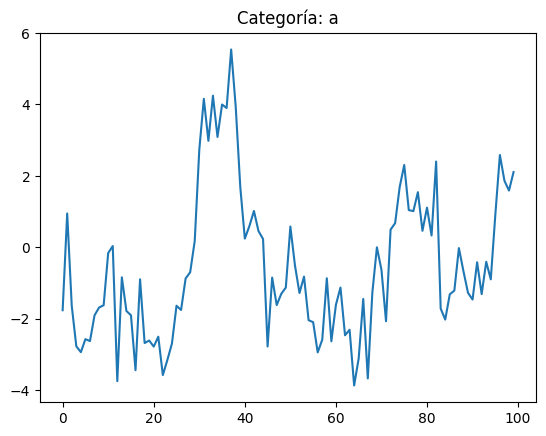

In [5]:
plt.plot(X[0])
plt.title(f"Categoría: {y[0]}")
plt.show()

Let's see how a convolution looks like

We start without padding

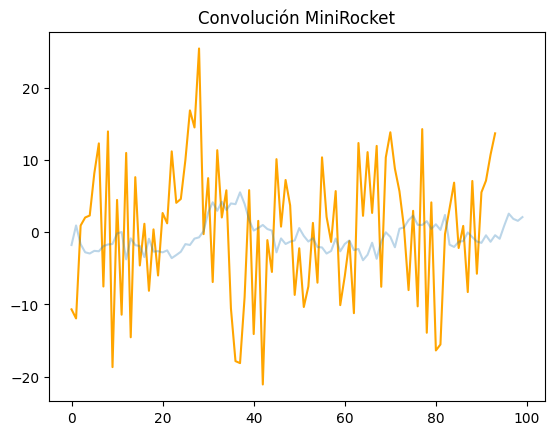

In [6]:
ker = np.array([-2.0, -2.0, -2.0, 5.0, -2.0, 5.0, -2.0])
conv_x0 = []

for i in range(len(X[0]) - 7 + 1):
    res=np.array(X[0][i:i+7].dot(ker))
    conv_x0.append(res)

plt.plot(conv_x0, color='orange')
plt.plot(X[0], alpha=0.3)
plt.title("Convolución MiniRocket")
plt.show()

Calculamos todas las convoluciones sobre este kernel

In [7]:
def compute_all_convolutions(X, kernel):
    all_convolutions = []
    for idx in range(len(X)):
        conv_x = []
        for i in range(len(X[idx]) - len(kernel) + 1):
            res=np.array(X[idx][i:i+len(kernel)].dot(kernel))
            conv_x.append(res)
        all_convolutions.append(conv_x)
    return all_convolutions

In [8]:
all_convolutions = compute_all_convolutions(X, ker)
all_convolutions[0]

[array(-10.67832761),
 array(-11.93548459),
 array(0.93974279),
 array(2.05128665),
 array(2.32656831),
 array(8.14774422),
 array(12.32194209),
 array(-7.51189749),
 array(13.98151603),
 array(-18.68383717),
 array(4.48649169),
 array(-11.41957799),
 array(10.99820241),
 array(-14.54708204),
 array(7.64142744),
 array(-4.59805491),
 array(1.18355641),
 array(-8.10411774),
 array(0.40481162),
 array(-5.98460383),
 array(2.67514081),
 array(1.24355424),
 array(11.2146413),
 array(4.08557509),
 array(4.6201302),
 array(10.01030176),
 array(16.89747392),
 array(14.53206356),
 array(25.4748901),
 array(-0.25346583),
 array(7.50563872),
 array(-6.89323873),
 array(11.3806928),
 array(2.05664914),
 array(5.81958795),
 array(-10.54640854),
 array(-17.85184401),
 array(-18.12901057),
 array(-9.00583559),
 array(5.84116665),
 array(-14.10086916),
 array(1.58487146),
 array(-21.08872567),
 array(-1.08275856),
 array(-5.49428929),
 array(10.13758472),
 array(0.78760349),
 array(7.2489153),
 array

For calculating the biases we differ from the original paper, which samples 
quantiles from a single random training example. Instead, we extract a 5% 
random sample of the training set and calculate quantiles from the aggregated 
convolution outputs. 

This approach provides a more robust and representative 
estimation of the data distribution, especially for smaller datasets where 
a single example might be an outlier.

In [9]:
import random

n_samples = int(0.05 * len(X))
indices = random.sample(range(len(X)), n_samples)
all_sample_convolutions = []

for idx in indices:
    conv_x0 = []

    for i in range(len(X[idx]) - 7 + 1):
        res=np.array(X[idx][i:i+7].dot(ker))
        conv_x0.append(res)
    all_sample_convolutions.extend(conv_x0)
bias = np.percentile(all_sample_convolutions, 50)

print(bias)

-0.017091906267562962


In [10]:
all_convolutions[:10]

[[array(-10.67832761),
  array(-11.93548459),
  array(0.93974279),
  array(2.05128665),
  array(2.32656831),
  array(8.14774422),
  array(12.32194209),
  array(-7.51189749),
  array(13.98151603),
  array(-18.68383717),
  array(4.48649169),
  array(-11.41957799),
  array(10.99820241),
  array(-14.54708204),
  array(7.64142744),
  array(-4.59805491),
  array(1.18355641),
  array(-8.10411774),
  array(0.40481162),
  array(-5.98460383),
  array(2.67514081),
  array(1.24355424),
  array(11.2146413),
  array(4.08557509),
  array(4.6201302),
  array(10.01030176),
  array(16.89747392),
  array(14.53206356),
  array(25.4748901),
  array(-0.25346583),
  array(7.50563872),
  array(-6.89323873),
  array(11.3806928),
  array(2.05664914),
  array(5.81958795),
  array(-10.54640854),
  array(-17.85184401),
  array(-18.12901057),
  array(-9.00583559),
  array(5.84116665),
  array(-14.10086916),
  array(1.58487146),
  array(-21.08872567),
  array(-1.08275856),
  array(-5.49428929),
  array(10.13758472),

In [11]:
conv_x0_biased = [1 if val > bias else 0 for val in conv_x0]

ppv_x0 = sum(conv_x0_biased) / len(conv_x0_biased)
print(f"PPV de la serie 0 con el sesgo {bias:.4f}: {ppv_x0:.4f}")

PPV de la serie 0 con el sesgo -0.0171: 0.5638


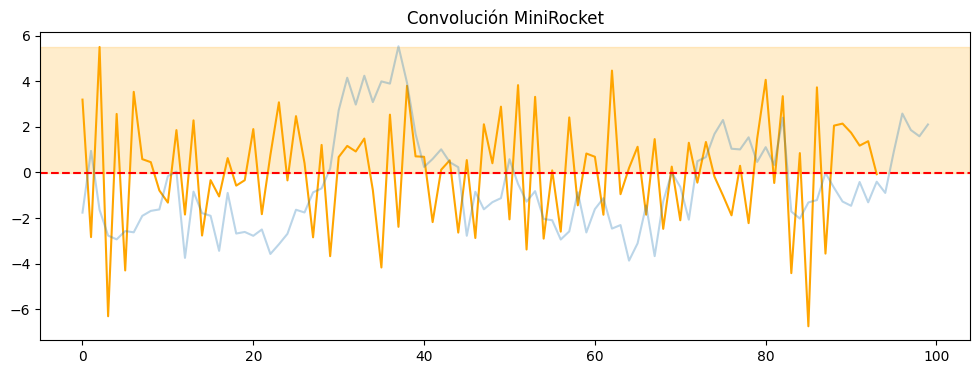

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(conv_x0, color='orange')
plt.plot(X[0], alpha=0.3)
plt.title("Convolución MiniRocket")
plt.axhline(bias, color='red', linestyle='--', label='Bias')
plt.axhspan(ymin=bias, ymax=max(conv_x0), alpha=0.2, color='orange')
plt.show()


In [13]:
all_convolutions[0]

[array(-10.67832761),
 array(-11.93548459),
 array(0.93974279),
 array(2.05128665),
 array(2.32656831),
 array(8.14774422),
 array(12.32194209),
 array(-7.51189749),
 array(13.98151603),
 array(-18.68383717),
 array(4.48649169),
 array(-11.41957799),
 array(10.99820241),
 array(-14.54708204),
 array(7.64142744),
 array(-4.59805491),
 array(1.18355641),
 array(-8.10411774),
 array(0.40481162),
 array(-5.98460383),
 array(2.67514081),
 array(1.24355424),
 array(11.2146413),
 array(4.08557509),
 array(4.6201302),
 array(10.01030176),
 array(16.89747392),
 array(14.53206356),
 array(25.4748901),
 array(-0.25346583),
 array(7.50563872),
 array(-6.89323873),
 array(11.3806928),
 array(2.05664914),
 array(5.81958795),
 array(-10.54640854),
 array(-17.85184401),
 array(-18.12901057),
 array(-9.00583559),
 array(5.84116665),
 array(-14.10086916),
 array(1.58487146),
 array(-21.08872567),
 array(-1.08275856),
 array(-5.49428929),
 array(10.13758472),
 array(0.78760349),
 array(7.2489153),
 array

In [14]:
def plot_convolution_with_bias(serie, conv, bias, ppv_value):
    
    # Crear valores para el scatter
    x_points = range(len(conv))
    colors = ['green' if val > bias else 'red' for val in conv]

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.scatter(x_points, conv, c=colors, alpha=0.6, s=30)
    ax1.axhline(bias, color='black', linestyle='--', linewidth=2, label=f'Bias = {bias:.4f}')
    ax1.plot(serie, alpha=0.2, color='gray', label='Serie original')
    ax1.plot(conv, alpha=0.2, color='orange', label='Convolución')

    # Contar puntos
    n_positivos = sum(1 for val in conv if val > bias)
    n_negativos = len(conv) - n_positivos

    ax1.set_title(f'Convolución - Verde: {n_positivos} puntos ({ppv_value:.1%}) | Rojo: {n_negativos} puntos')
    ax1.legend()
    ax1.grid(alpha=0.3)

    ax2.pie([n_positivos, n_negativos], 
            labels=[f'> bias: {ppv_value:.1%}', f'≤ bias: {1-ppv_value:.1%}'],
            colors=['green', 'red'],
            autopct='%1.1f%%',
            startangle=90)
    ax2.set_title('Proporción PPV')
    plt.tight_layout()
    plt.show()

In [15]:
conv_x0_biased = [1 if val > bias else 0 for val in conv_x0]

ppv_x0 = sum(conv_x0_biased) / len(conv_x0_biased)
print(f"PPV de la serie 0 con el sesgo {bias:.4f}: {ppv_x0:.4f}")

PPV de la serie 0 con el sesgo -0.0171: 0.5638


In [16]:
def calculate_ppv(convolution, bias):
    biased = [1 if val > bias else 0 for val in convolution]
    ppv = sum(biased) / len(biased)
    return ppv

For this kernel we make the convolution to all samples to get all ppvs.

In [17]:
ppv = []
for i, x in enumerate(X):
    conv = []

    for j in range(len(x) - 7 + 1):
        res=np.array(x[j:j+7].dot(ker))
        conv.append(res)
    
    conv_biased = [1 if val > bias else 0 for val in conv]
    ppv_value = sum(conv_biased) / len(conv_biased)
    ppv.append(ppv_value)
    
print(ppv[:10])

[0.5851063829787234, 0.48936170212765956, 0.5319148936170213, 0.5, 0.5638297872340425, 0.5212765957446809, 0.44680851063829785, 0.5851063829787234, 0.5531914893617021, 0.5106382978723404]


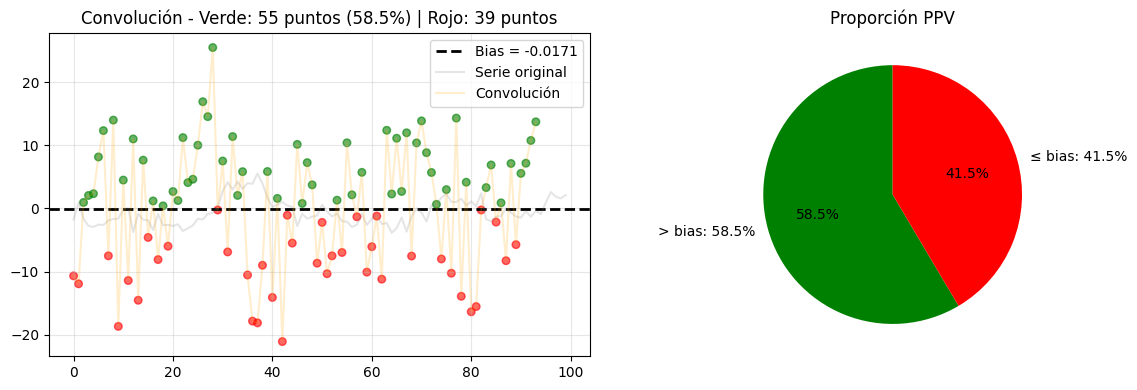

In [18]:
plot_convolution_with_bias(X[0], all_convolutions[0], bias, ppv[0])

In [19]:
indices[:3]

[544, 502, 501]

In [20]:
len(all_convolutions[343])

94

Ploteamos 3 samples con las que hemos calculado el bias.

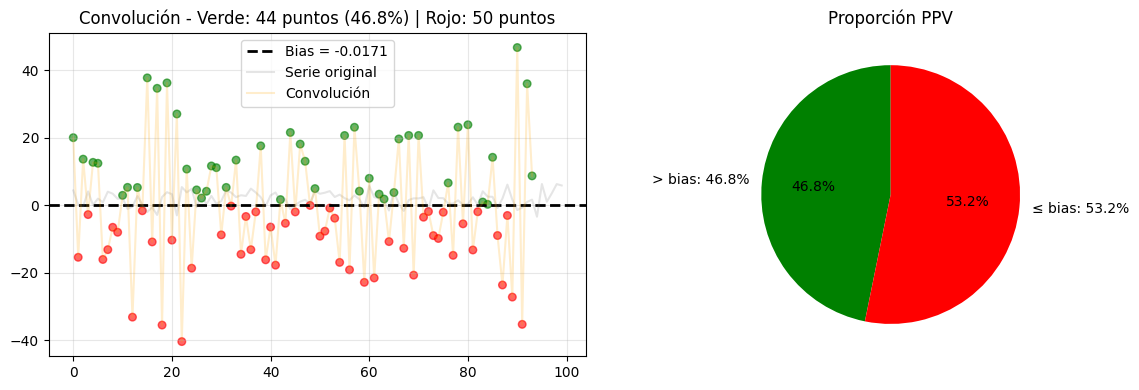

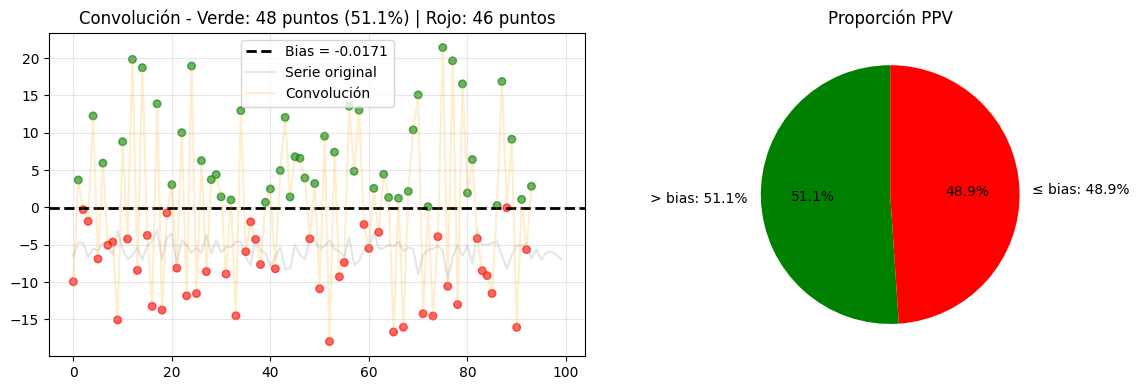

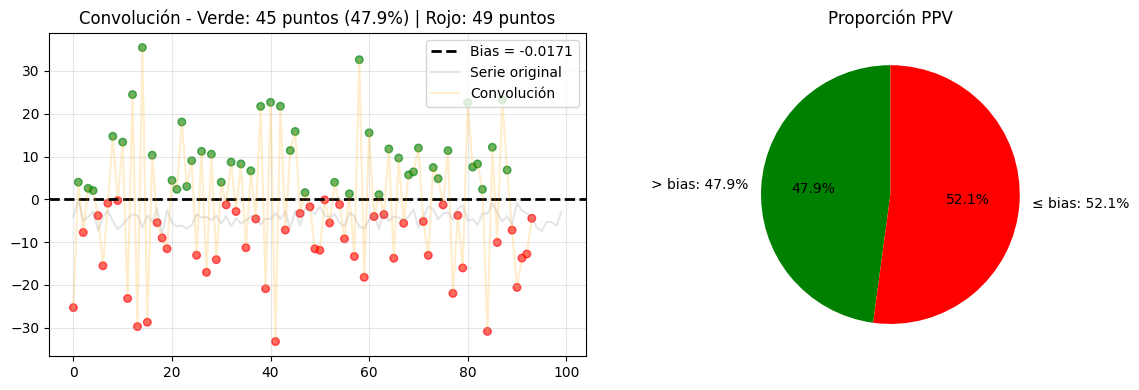

In [21]:
for idx in indices[:3]:    
    plot_convolution_with_bias(X[idx], all_convolutions[idx], bias, ppv[idx])

Vamos ahora a generar todas las features con la combinación de kernels, dilations y biases.

Respecto al kernel tenemos: 7 sobre 2 posibles combinaciones (C(7,2) = 7!/(2!×5!) = 21 combinaciones).
Dilations vamos a calcularlas con la fórmula del paper.
Y cuantiles usaremos los clásicos [25, 50, 75]

Para nuestro caso tendremos: 
num_features = num_kernels × num_dilations × num_quantiles
num_features = 21 × 2 × 3 = 126

In [22]:
# DILATIONS:
# 
l_input = len(X[0])  # 100
l_kernel = 7
num_dilations = 16  # reducido respecto al paper

max_exponent = np.log2(l_input - 1) / (l_kernel - 1)
print(f"Máximo exponente para dilaciones: {max_exponent:.4f}")
exponents = np.linspace(0, max_exponent, num_dilations)
print(exponents)
dilations = np.floor(2 ** exponents).astype(int)
dilations = np.unique(dilations)
print(f"Dilations: {dilations}")

Máximo exponente para dilaciones: 1.1049
[0.         0.07365952 0.14731904 0.22097855 0.29463807 0.36829759
 0.44195711 0.51561663 0.58927614 0.66293566 0.73659518 0.8102547
 0.88391422 0.95757373 1.03123325 1.10489277]
Dilations: [1 2]


In [23]:
from itertools import combinations

# Genera todas las combinaciones de 2 posiciones de 7
posiciones = list(combinations(range(7), 2))
posiciones

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 5),
 (4, 6),
 (5, 6)]

In [24]:
kernels = []
for pos in posiciones:
    print(pos)
    kernel = np.zeros(7)
    kernel -= 2.0
    kernel[pos[0]] = 5.0
    kernel[pos[1]] = 5.0
    kernels.append(kernel)
    print(kernel)

(0, 1)
[ 5.  5. -2. -2. -2. -2. -2.]
(0, 2)
[ 5. -2.  5. -2. -2. -2. -2.]
(0, 3)
[ 5. -2. -2.  5. -2. -2. -2.]
(0, 4)
[ 5. -2. -2. -2.  5. -2. -2.]
(0, 5)
[ 5. -2. -2. -2. -2.  5. -2.]
(0, 6)
[ 5. -2. -2. -2. -2. -2.  5.]
(1, 2)
[-2.  5.  5. -2. -2. -2. -2.]
(1, 3)
[-2.  5. -2.  5. -2. -2. -2.]
(1, 4)
[-2.  5. -2. -2.  5. -2. -2.]
(1, 5)
[-2.  5. -2. -2. -2.  5. -2.]
(1, 6)
[-2.  5. -2. -2. -2. -2.  5.]
(2, 3)
[-2. -2.  5.  5. -2. -2. -2.]
(2, 4)
[-2. -2.  5. -2.  5. -2. -2.]
(2, 5)
[-2. -2.  5. -2. -2.  5. -2.]
(2, 6)
[-2. -2.  5. -2. -2. -2.  5.]
(3, 4)
[-2. -2. -2.  5.  5. -2. -2.]
(3, 5)
[-2. -2. -2.  5. -2.  5. -2.]
(3, 6)
[-2. -2. -2.  5. -2. -2.  5.]
(4, 5)
[-2. -2. -2. -2.  5.  5. -2.]
(4, 6)
[-2. -2. -2. -2.  5. -2.  5.]
(5, 6)
[-2. -2. -2. -2. -2.  5.  5.]


In [25]:
def calculate_biases_for_kernel_dilation(X, kernel, dilation, quantiles):
    """
    Calcula múltiples bias para una combinación (kernel, dilation).
    
    Returns:
        list: [bias_q25, bias_q50, bias_q75]
    """
    n_samples = int(0.05 * len(X))
    indices = random.sample(range(len(X)), n_samples)
    all_sample_convolutions = []
    
    effective_length = (len(kernel) - 1) * dilation + 1
    
    for idx in indices:
        conv = []
        for i in range(len(X[idx]) - effective_length + 1):
            window = X[idx][i : i + effective_length : dilation]
            res = window.dot(kernel)
            conv.append(res)
        all_sample_convolutions.extend(conv)
    
    biases = [np.percentile(all_sample_convolutions, q) for q in quantiles]
    
    return biases

In [26]:
np.set_printoptions(
    precision=4,       # Número de decimales
    suppress=True,     # Evita la notación científica
    linewidth=300,     # Ancho de línea para evitar cortes
    edgeitems=7,       # Número de elementos al inicio y final de la matriz
    threshold=2000     # Umbral para resumir matrices grandes
)

In [27]:
dilation = [1, 2, 4, 8, 16][1]
quantiles = [25, 50, 75]
kernel = kernels[0]

n_samples = int(0.05 * len(X))
indices = random.sample(range(len(X)), n_samples)
all_sample_convolutions = []

effective_length = (len(kernel) - 1) * dilation + 1
print(f"Effective length: {effective_length}")
print(f"Using dilation: {dilation}")
print(f"Using kernel: {kernel}")
print(f"Using {n_samples} samples.")
print(f"Indices: {indices[:]} ... \n\n")

for idx in indices:
    conv = []
    print(f'Index {idx}, first 10 steps {X[idx][:10]}')
    for i in range(len(X[idx]) - effective_length + 1):
        window = X[idx][i : i + effective_length : dilation]
        print(f"Window: {window}")
        res = window.dot(kernel)
        print(f"Convolution result: {res}\n")
        conv.append(res)
    all_sample_convolutions.extend(conv)

biases = [np.percentile(all_sample_convolutions, q) for q in quantiles]

Effective length: 13
Using dilation: 2
Using kernel: [ 5.  5. -2. -2. -2. -2. -2.]
Using 46 samples.
Indices: [600, 785, 602, 715, 407, 591, 65, 574, 881, 588, 291, 620, 158, 256, 395, 304, 516, 858, 683, 819, 156, 713, 329, 900, 161, 387, 504, 98, 432, 470, 612, 566, 605, 890, 517, 5, 218, 610, 6, 344, 348, 46, 582, 480, 706, 288] ... 


Index 600, first 10 steps [5.9299 4.9967 6.0459 6.0727 7.173  6.2793 5.655  6.7754 6.031  5.9797]
Window: [5.9299 6.0459 7.173  5.655  6.031  5.7094 6.6457]
Convolution result: -2.5496754500976984

Window: [4.9967 6.0727 6.2793 6.7754 5.9797 4.8446 6.1041]
Convolution result: -4.61951668515248

Window: [6.0459 7.173  5.655  6.031  5.7094 6.6457 5.4201]
Convolution result: 7.171994167696322

Window: [6.0727 6.2793 6.7754 5.9797 4.8446 6.1041 6.6895]
Convolution result: 0.9732894537123471

Window: [7.173  5.655  6.031  5.7094 6.6457 5.4201 6.8475]
Convolution result: 2.83297869544732

Window: [6.2793 6.7754 5.9797 4.8446 6.1041 6.6895 6.0677]
Convolutio

In [28]:
def calculate_all_convolutions(X, kernel, dilation):
    all_conv = []
    effective_length = (len(kernel) - 1) * dilation + 1
    
    for x in X:
        conv = []
        for i in range(len(x) - effective_length + 1):
            window = x[i : i + effective_length : dilation]
            res = window.dot(kernel)
            conv.append(res)
        all_conv.append(conv)
    
    return all_conv

In [29]:
dilations

array([1, 2])

In [30]:
quantiles = [25, 50, 75]
all_features = []
quantity_of_features = 0

for kernel in kernels:
    for dilation in dilations:
        print(f"Kernel: {kernel}, Dilation: {dilation}")
        # Aquí iría el cálculo de las convoluciones dilatadas y la extracción de características
        biases = calculate_biases_for_kernel_dilation(X, kernel, dilation, quantiles)
        print(f"Biases (Q25, Q50, Q75): {biases}")

        all_convolutions = calculate_all_convolutions(X, kernel, dilation)

        for bias in biases:
            ppvs_for_bias = []
            print(f"  Calculando convoluciones con bias {bias:.4f}...")
            for convolution in all_convolutions:
                ppv = calculate_ppv(convolution, bias)
                ppvs_for_bias.append(ppv)
                print(f"    PPV ejemplo: {ppv:.4f}")
            all_features.append(ppvs_for_bias)
            quantity_of_features += 1

print(f"Total de características generadas: {quantity_of_features}")


Kernel: [ 5.  5. -2. -2. -2. -2. -2.], Dilation: 1
Biases (Q25, Q50, Q75): [np.float64(-3.272947533526801), np.float64(0.01515910782628005), np.float64(3.454669414567946)]
  Calculando convoluciones con bias -3.2729...
    PPV ejemplo: 0.5426
    PPV ejemplo: 0.5319
    PPV ejemplo: 1.0000
    PPV ejemplo: 0.6277
    PPV ejemplo: 1.0000
    PPV ejemplo: 0.7660
    PPV ejemplo: 0.6170
    PPV ejemplo: 1.0000
    PPV ejemplo: 0.5957
    PPV ejemplo: 0.6383
    PPV ejemplo: 0.5319
    PPV ejemplo: 1.0000
    PPV ejemplo: 0.6596
    PPV ejemplo: 1.0000
    PPV ejemplo: 0.7128
    PPV ejemplo: 0.5319
    PPV ejemplo: 0.5426
    PPV ejemplo: 0.6915
    PPV ejemplo: 0.8830
    PPV ejemplo: 1.0000
    PPV ejemplo: 0.9362
    PPV ejemplo: 0.6809
    PPV ejemplo: 0.6383
    PPV ejemplo: 0.5638
    PPV ejemplo: 0.6170
    PPV ejemplo: 1.0000
    PPV ejemplo: 0.6596
    PPV ejemplo: 0.5426
    PPV ejemplo: 0.9894
    PPV ejemplo: 0.7447
    PPV ejemplo: 0.6915
    PPV ejemplo: 1.0000
    PPV ejemp

In [31]:
## Probamos el modelo

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 20% para test
    random_state=RANDOM_STATE,  # reproducibilidad
    stratify=y  # mantiene proporción de clases
)

In [33]:
y[:10]

array(['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a'], dtype='<U1')

In [34]:
print(np.unique(y))
print(f"Número de clases: {len(np.unique(y))}")

['a' 'b' 'c' 'd']
Número de clases: 4


In [35]:
print(len(X_train), len(X_test), len(y_train), len(y_test))


751 188 751 188


In [36]:
import pandas as pd

# Crear nombres descriptivos de columnas
feature_names = []
feature_matrix = []

for i_kernel, kernel in enumerate(kernels):
    for i_dil, dilation in enumerate(dilations):
        biases = calculate_biases_for_kernel_dilation(X, kernel, dilation, quantiles)
        all_convolutions = calculate_all_convolutions(X, kernel, dilation)

        for i_q, bias in enumerate(biases):
            # Calcular features
            ppvs_for_bias = []
            for convolution in all_convolutions:
                ppv = calculate_ppv(convolution, bias)
                ppvs_for_bias.append(ppv)

            # Nombre descriptivo
            name = f"PPV_k{i_kernel}_d{dilation}_q{quantiles[i_q]}"
            feature_names.append(name)
            feature_matrix.append(ppvs_for_bias)

# Transponer y crear DataFrame
feature_matrix = np.array(feature_matrix).T  # (n_samples, n_features)
df_features = pd.DataFrame(feature_matrix, columns=feature_names)

# Ahora puedes ver fácilmente
display(df_features.head(10))
print(df_features.loc[0][:5])  # Features de la muestra 0

PPV_k0_d1_q25  PPV_k0_d1_q50  PPV_k0_d1_q75  PPV_k0_d2_q25  PPV_k0_d2_q50  \
0       0.542553       0.457447       0.425532       0.602273       0.545455   
1       0.531915       0.468085       0.414894       0.545455       0.477273   
2       1.000000       0.510638       0.000000       1.000000       0.590909   
3       0.627660       0.542553       0.436170       0.659091       0.579545   
4       1.000000       0.468085       0.000000       1.000000       0.420455   
5       0.712766       0.531915       0.234043       0.738636       0.602273   
6       0.606383       0.563830       0.500000       0.602273       0.500000   
7       1.000000       0.457447       0.000000       1.000000       0.431818   
8       0.574468       0.489362       0.372340       0.545455       0.386364   
9       0.595745       0.542553       0.414894       0.636364       0.545455   

   PPV_k0_d2_q75  PPV_k1_d1_q25  PPV_k1_d1_q50  PPV_k1_d1_q75  PPV_k1_d2_q25  \
0       0.409091       0.563830       0.478723       0.382979       0.602273   
1       0.409091       0.617021       0.500000       0.393617       0.534091   
2       0.000000       1.000000       0.510638       0.000000       1.000000   
3       0.454545       0.606383       0.521277       0.425532       0.670455   
4       0.000000       1.000000       0.446809       0.000000       1.000000   
5       0.147727       0.755319       0.521277       0.148936       0.715909   
6       0.443182       0.617021       0.531915       0.489362       0.568182   
7       0.000000       1.000000       0.446809       0.000000       1.000000   
8       0.306818       0.595745       0.521277       0.372340       0.465909   
9       0.431818       0.670213       0.489362       0.393617       0.590909   

   ...  PPV_k19_d1_q75  PPV_k19_d2_q25  PPV_k19_d2_q50  PPV_k19_d2_q75  \
0  ...        0.446809        0.613636        0.454545        0.363636   
1  ...        0.414894        0.545455        0.465909        0.397727   
2  ...        0.000000        1.000000        0.443182        0.000000   
3  ...        0.414894        0.556818        0.375000        0.329545   
4  ...        0.000000        1.000000        0.556818        0.000000   
5  ...        0.191489        0.806818        0.397727        0.215909   
6  ...        0.382979        0.534091        0.454545        0.397727   
7  ...        0.000000        1.000000        0.511364        0.000000   
8  ...        0.436170        0.670455        0.579545        0.443182   
9  ...        0.372340        0.534091        0.443182        0.397727   

   PPV_k20_d1_q25  PPV_k20_d1_q50  PPV_k20_d1_q75  PPV_k20_d2_q25  \
0        0.627660        0.510638        0.404255        0.534091   
1        0.595745        0.500000        0.393617        0.625000   
2        1.000000        0.457447        0.000000        1.000000   
3        0.574468        0.446809        0.382979        0.477273   
4        1.000000        0.500000        0.000000        1.000000   
5        0.840426        0.468085        0.223404        0.784091   
6        0.510638        0.425532        0.382979        0.511364   
7        1.000000        0.457447        0.000000        1.000000   
8        0.627660        0.510638        0.446809        0.715909   
9        0.521277        0.446809        0.329787        0.602273   

   PPV_k20_d2_q50  PPV_k20_d2_q75  
0        0.465909        0.409091  
1        0.534091        0.454545  
2        0.477273        0.000000  
3        0.397727        0.352273  
4        0.556818        0.000000  
5        0.375000        0.284091  
6        0.465909        0.454545  
7        0.545455        0.000000  
8        0.602273        0.477273  
9        0.454545        0.409091  

[10 rows x 126 columns]

PPV_k0_d1_q25    0.542553
PPV_k0_d1_q50    0.457447
PPV_k0_d1_q75    0.425532
PPV_k0_d2_q25    0.602273
PPV_k0_d2_q50    0.545455
Name: 0, dtype: float64


In [37]:
print(df_features.shape)

(939, 126)


Creamos una clase para fácil uso.

In [38]:
class miniminirocket():
    def __init__(self):
        self.kernel_size = 7
        self.quantity_values = 2
        self.feature_value_1 = -2
        self.feature_value_2 = 5
        self.quantiles = [25, 50, 75]
        self.combinations = list(combinations(range(self.kernel_size), self.quantity_values))
        self.num_dilations =  16  

    def calculate_ppv(self, convolution, bias):
        biased = [1 if val > bias else 0 for val in convolution]
        ppv = sum(biased) / len(biased)
        return ppv
    
    def calculate_biases_for_kernel_dilation(self, X, kernel, dilation, quantiles):
        n_samples = int(0.05 * len(X))
        indices = random.sample(range(len(X)), n_samples)
        all_sample_convolutions = []
        
        effective_length = (self.kernel_size - 1) * dilation + 1
        
        for idx in indices:
            conv = []
            for i in range(len(X[idx]) - effective_length + 1):
                window = X[idx][i : i + effective_length : dilation]
                res = window.dot(kernel)
                conv.append(res)
            all_sample_convolutions.extend(conv)
        
        biases = [np.percentile(all_sample_convolutions, q) for q in quantiles]
        return biases
    
    def calculate_all_convolutions(self, X, kernel, dilation):
        all_conv = []
        effective_length = (len(kernel) - 1) * dilation + 1
        
        for x in X:
            conv = []
            for i in range(len(x) - effective_length + 1):
                window = x[i : i + effective_length : dilation]
                res = window.dot(kernel)
                conv.append(res)
            all_conv.append(conv)
        
        return all_conv

    def fit(self, X):
        l_input = len(X[0])
        max_exponent = np.log2(l_input - 1) / (self.kernel_size - 1)
        exponents = np.linspace(0, max_exponent, num_dilations)
        self.dilations = np.floor(2 ** exponents).astype(int)
        self.dilations = np.unique(self.dilations)

        self.kernels = []
        for pos in self.combinations:
            kernel = np.zeros(self.kernel_size)
            kernel += self.feature_value_1
            kernel[pos[0]] = self.feature_value_2
            kernel[pos[1]] = self.feature_value_2
            self.kernels.append(kernel)

        self.all_features = []
        self.quantity_of_features = 0
        self.configurations = []

        for kernel in self.kernels:
            for dilation in self.dilations:
                biases = self.calculate_biases_for_kernel_dilation(X, kernel, dilation, self.quantiles)
                for bias in biases:
                    self.configurations.append((kernel, dilation, bias))
                    self.quantity_of_features += 1
        return self
        
    def transform(self, X):
        all_features = []

        for kernel, dilation, bias in self.configurations:
                all_convolutions = self.calculate_all_convolutions(X, kernel, dilation)
                ppvs_for_bias = []
                for convolution in all_convolutions:
                    ppv = self.calculate_ppv(convolution, bias)
                    ppvs_for_bias.append(ppv)

                all_features.append(ppvs_for_bias)

        return np.array(all_features).T

probamos la clase

In [39]:
model = miniminirocket()

model.fit(X_train)

X_train_features = model.transform(X_train)
print(type(X_train_features))
print(len(X_train_features))  # ¿Cuántas features?
print(len(X_train_features[0])) 

<class 'numpy.ndarray'>
751
126


el código es un poco lento porque no está optimizado para rendimiento y tampoco se han aplicado los trucos de ahorro computacional del paper original.

In [40]:
model.quantity_of_features

126

In [41]:
X_train_features[0]

array([0.8085, 0.4787, 0.2021, 0.7841, 0.4886, 0.2614, 0.6383, 0.4574, 0.2979, 0.6591, 0.5341, 0.2955, 0.7021, 0.5213, 0.2979, 0.7841, 0.5227, 0.2841, 0.7021, 0.4787, 0.2872, 0.6705, 0.5   , 0.375 , 0.7234, 0.4681, 0.2979, 0.7045, 0.5   , 0.3409, 0.6489, 0.5106, 0.383 , 0.8182, 0.4545, 0.2273,
       0.6809, 0.5319, 0.3298, 0.7614, 0.4886, 0.2273, 0.6277, 0.4574, 0.3085, 0.75  , 0.5341, 0.3068, 0.6702, 0.4681, 0.3404, 0.7386, 0.5227, 0.25  , 0.7128, 0.5   , 0.2979, 0.6591, 0.4773, 0.375 , 0.6489, 0.5   , 0.3617, 0.7159, 0.4886, 0.2955, 0.7128, 0.5426, 0.2979, 0.7841, 0.4659, 0.2159,
       0.6702, 0.4787, 0.3085, 0.6932, 0.5   , 0.3409, 0.6277, 0.4787, 0.3723, 0.6705, 0.4886, 0.3068, 0.734 , 0.5319, 0.3085, 0.6705, 0.4773, 0.3182, 0.7447, 0.5532, 0.266 , 0.5909, 0.4205, 0.3068, 0.6809, 0.4787, 0.3191, 0.75  , 0.5114, 0.2273, 0.7021, 0.5   , 0.2766, 0.7386, 0.5114, 0.2159,
       0.7128, 0.5213, 0.3191, 0.6705, 0.4432, 0.25  , 0.7234, 0.4787, 0.3085, 0.6705, 0.5   , 0.25  , 0.7766, 0.57

## Analizando y desmenuzando Ridge classifier para entenderlo

In [42]:
alpha=1.0
def _add_intercept(X):
    """
    Agrega una columna de 1s al inicio de X para calcular el sesgo (intercept/bias)
    dentro de la misma operación matricial.
    """
    intercept_col = np.ones((X.shape[0], 1))
    return np.concatenate((intercept_col, X), axis=1)

classes_ = np.unique(y)
print(classes_, y.shape[0])
# Si es binario, convertimos a -1 y 1 (o 0 y 1). 
# Si es multiclase, usamos One-Hot Encoding (matriz de -1 y 1)
y_encoded = np.zeros((y.shape[0], len(classes_)))
print(y_encoded.shape)
print(y_encoded[0])
for i, c in enumerate(classes_):
    y_encoded[:, i] = np.where(y == c, 1, -1)
# print(y_encoded[:10])
# print()
# print(y_encoded)
# print(y[-10:])
# 2. Agregar la columna de unos para el intercepto (Bias trick)
X_b = _add_intercept(df_features)
print(X_b)
# # 3. Preparar la Matriz de Regularización (Alpha * Identidad)
n_features = X_b.shape[1]
# print(np.eye(n_features))
A = alpha * np.eye(n_features)
print(A.shape)
# print(A[0],'\n', A[1])
A[0, 0] = 0  # IMPORTANTE: No penalizamos el intercepto (el primer término)

# # 4. LA ECUACIÓN MÁGICA (Solución cerrada)
# # w = (X.T * X + A)^-1 * X.T * y

# print("--- Iniciando cálculo matricial ---")
# print(f"Dimensiones de X (con bias): {X_b.shape}")

# # XtX + A
XtX = X_b.T @ X_b
print(XtX.shape)
print(XtX)
print()
regularized_matrix = XtX + A
print(A.shape)
print(A)
print()
print(regularized_matrix.shape)
print(regularized_matrix)

# Inversa
try:
    inverse_matrix = np.linalg.inv(regularized_matrix)
    print(inverse_matrix.shape)
    print(inverse_matrix)
except np.linalg.LinAlgError:
    # Si es singular, usamos la pseudo-inversa
    inverse_matrix = np.linalg.pinv(regularized_matrix)
    print(inverse_matrix)
    
# # XtY
XtY = X_b.T @ y_encoded
print(XtY.shape)
print(XtY)

# # Pesos finales
weights = inverse_matrix @ XtY
print(weights.shape)
print(weights)

scores = X_b @ weights
print(scores.shape)
print(scores)

['a' 'b' 'c' 'd'] 939
(939, 4)
[0. 0. 0. 0.]
[[1.     0.5426 0.4574 0.4255 0.6023 0.5455 0.4091 ... 0.3636 0.6277 0.5106 0.4043 0.5341 0.4659 0.4091]
 [1.     0.5319 0.4681 0.4149 0.5455 0.4773 0.4091 ... 0.3977 0.5957 0.5    0.3936 0.625  0.5341 0.4545]
 [1.     1.     0.5106 0.     1.     0.5909 0.     ... 0.     1.     0.4574 0.     1.     0.4773 0.    ]
 [1.     0.6277 0.5426 0.4362 0.6591 0.5795 0.4545 ... 0.3295 0.5745 0.4468 0.383  0.4773 0.3977 0.3523]
 [1.     1.     0.4681 0.     1.     0.4205 0.     ... 0.     1.     0.5    0.     1.     0.5568 0.    ]
 [1.     0.7128 0.5319 0.234  0.7386 0.6023 0.1477 ... 0.2159 0.8404 0.4681 0.2234 0.7841 0.375  0.2841]
 [1.     0.6064 0.5638 0.5    0.6023 0.5    0.4432 ... 0.3977 0.5106 0.4255 0.383  0.5114 0.4659 0.4545]
 ...
 [1.     0.6915 0.5106 0.266  0.8295 0.4545 0.125  ... 0.1136 0.8298 0.5213 0.1915 0.7955 0.5682 0.25  ]
 [1.     0.6596 0.4787 0.2979 0.6705 0.4205 0.1477 ... 0.3409 0.7872 0.5532 0.2979 0.7614 0.5909 0.4205]
 [1. 

Cabe señalar que la elección del alpha ha sido aleatoria (es un hiperparámetro) y que lo normal es hacer una búsqueda por varios alphas hasta encontrar el óptimo.

In [43]:
class RidgeClassifierScratch():
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        self.classes_ = None

    def _add_intercept(self, X):
        """
        Agrega una columna de 1s al inicio de X para calcular el sesgo (intercept/bias)
        dentro de la misma operación matricial.
        """
        intercept_col = np.ones((X.shape[0], 1))
        return np.concatenate((intercept_col, X), axis=1)

    def fit(self, X, y):
        # 1. Identificar clases únicas y convertir y a One-Hot Encoding si es necesario
        # Ridge funciona tratando la clasificación como regresión.
        self.classes_ = np.unique(y)
        
        # Si es binario, convertimos a -1 y 1 (o 0 y 1). 
        # Si es multiclase, usamos One-Hot Encoding (matriz de -1 y 1)
        y_encoded = np.zeros((y.shape[0], len(self.classes_)))
        for i, c in enumerate(self.classes_):
            y_encoded[:, i] = np.where(y == c, 1, -1)
            
        # 2. Agregar la columna de unos para el intercepto (Bias trick)
        X_b = self._add_intercept(X)
        
        # 3. Preparar la Matriz de Regularización (Alpha * Identidad)
        n_features = X_b.shape[1]
        A = self.alpha * np.eye(n_features)
        A[0, 0] = 0  # IMPORTANTE: No penalizamos el intercepto (el primer término)

        # 4. LA ECUACIÓN MÁGICA (Solución cerrada)
        # w = (X.T * X + A)^-1 * X.T * y
        
        print("--- Iniciando cálculo matricial ---")
        print(f"Dimensiones de X (con bias): {X_b.shape}")
        
        # XtX + A
        XtX = X_b.T @ X_b
        regularized_matrix = XtX + A
        
        # Inversa
        try:
            inverse_matrix = np.linalg.inv(regularized_matrix)
        except np.linalg.LinAlgError:
            # Si es singular, usamos la pseudo-inversa
            inverse_matrix = np.linalg.pinv(regularized_matrix)
            
        # XtY
        XtY = X_b.T @ y_encoded
        
        # Pesos finales
        self.weights = inverse_matrix @ XtY
        
        print(f"Pesos calculados. Dimensiones de w: {self.weights.shape}")
        
        return self

    def predict(self, X):
        # 1. Agregar intercepto
        X_b = self._add_intercept(X)
        
        # 2. Calcular puntuaciones (scores) lineales: X * w
        scores = X_b @ self.weights
        
        # 3. Decisión: Argmax
        # Tomamos el índice de la columna con el score más alto para cada fila
        indices = np.argmax(scores, axis=1)
        
        # 4. Mapear índices de vuelta a las etiquetas originales
        return self.classes_[indices]

In [ ]:
from sklearn.metrics import accuracy_score

classifier = RidgeClassifierScratch()

classifier.fit(X_train_features, y_train)
y_train_pred = classifier.predict(X_train_features)

train_acc = accuracy_score(y_train, y_train_pred)
print(f"\nTrain accuracy: {train_acc:.4f}")

X_test_features = model.transform(X_test)
y_test_pred = classifier.predict(X_test_features)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_acc:.4f}")

--- Iniciando cálculo matricial ---
Dimensiones de X (con bias): (751, 127)
Pesos calculados. Dimensiones de w: (127, 4)

Train accuracy: 0.7417
Test accuracy: 0.6436


Accuracy entorno al 70%, calculamos otras medidas (es multivariate):

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("\nTest classification report:")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)


Test classification report:
              precision    recall  f1-score   support

           a       0.64      0.60      0.62        42
           b       0.72      0.66      0.69        50
           c       0.59      0.55      0.57        40
           d       0.62      0.73      0.67        56

    accuracy                           0.64       188
   macro avg       0.64      0.63      0.64       188
weighted avg       0.65      0.64      0.64       188


Confusion Matrix:
[[25 11  3  3]
 [13 33  0  4]
 [ 0  0 22 18]
 [ 1  2 12 41]]


Resultados decentes, vemos si los podemos mejorar añadiendo más features como hacen en el paper multiROCKET.

para añadir más features podemos añadir los de multiROCKET

PPV, MPV, MIPV, LSPV

In [62]:
class minimultirocket():
    def __init__(self):
        self.kernel_size = 7
        self.quantity_values = 2
        self.feature_value_1 = -2
        self.feature_value_2 = 5
        self.quantiles = [25, 50, 75]
        self.combinations = list(combinations(range(self.kernel_size), self.quantity_values))
        self.num_dilations =  16  

    def calculate_features(self, convolution, bias):
        biased = [1 if val > bias else 0 for val in convolution]
        ppv = sum(biased) / len(convolution)
        
        positive_values = [val for val in convolution if val > bias]
        if len(positive_values) == 0:
            mpv = 0
        else:
            mpv = sum(positive_values) / len(positive_values)

        positive_indices = [i for i, val in enumerate(convolution) if val > bias]
        if len(positive_values) == 0:
            mipv = 0
        else:
            mipv = sum(positive_indices) / len(positive_indices)
        
        max_stretch = 0
        current_stretch = 0

        for val in convolution:
            if val > bias:
                current_stretch += 1
                if current_stretch > max_stretch:
                    max_stretch = current_stretch
            else:
                current_stretch = 0
        lspv = max_stretch

        return ppv, mpv, mipv, lspv
    
    def calculate_biases_for_kernel_dilation(self, X, kernel, dilation, quantiles):
        n_samples = int(0.05 * len(X))
        indices = random.sample(range(len(X)), n_samples)
        all_sample_convolutions = []
        
        effective_length = (self.kernel_size - 1) * dilation + 1
        
        for idx in indices:
            conv = []
            for i in range(len(X[idx]) - effective_length + 1):
                window = X[idx][i : i + effective_length : dilation]
                res = window.dot(kernel)
                conv.append(res)
            all_sample_convolutions.extend(conv)
        
        biases = [np.percentile(all_sample_convolutions, q) for q in quantiles]
        return biases
    
    def calculate_all_convolutions(self, X, kernel, dilation):
        all_conv = []
        effective_length = (len(kernel) - 1) * dilation + 1
        
        for x in X:
            conv = []
            for i in range(len(x) - effective_length + 1):
                window = x[i : i + effective_length : dilation]
                res = window.dot(kernel)
                conv.append(res)
            all_conv.append(conv)
        
        return all_conv

    def fit(self, X):
        l_input = len(X[0])
        max_exponent = np.log2(l_input - 1) / (self.kernel_size - 1)
        exponents = np.linspace(0, max_exponent, num_dilations)
        self.dilations = np.floor(2 ** exponents).astype(int)
        self.dilations = np.unique(self.dilations)

        self.kernels = []
        for pos in self.combinations:
            kernel = np.zeros(self.kernel_size)
            kernel += self.feature_value_1
            kernel[pos[0]] = self.feature_value_2
            kernel[pos[1]] = self.feature_value_2
            self.kernels.append(kernel)

        self.all_features = []
        self.quantity_of_features = 0
        self.configurations = []

        for kernel in self.kernels:
            for dilation in self.dilations:
                biases = self.calculate_biases_for_kernel_dilation(X, kernel, dilation, self.quantiles)
                for bias in biases:
                    self.configurations.append((kernel, dilation, bias))
                    self.quantity_of_features += 4
        return self
        
    def transform(self, X):
        all_features = []

        for kernel, dilation, bias in self.configurations:
            all_convolutions = self.calculate_all_convolutions(X, kernel, dilation)
            ppvs = []
            mpvs = []
            mipvs = []
            lspvs = []

            for convolution in all_convolutions:
                ppv, mpv, mipv, lspv = self.calculate_features(convolution, bias)
                ppvs.append(ppv)
                mpvs.append(mpv)
                mipvs.append(mipv)
                lspvs.append(lspv)

            all_features.append(ppvs)
            all_features.append(mpvs)
            all_features.append(mipvs)
            all_features.append(lspvs)

        return np.array(all_features).T
    

In [63]:
model2 = minimultirocket()

model2.fit(X_train)

X_train_features2 = model2.transform(X_train)
print(type(X_train_features2))
print(len(X_train_features2))
print(len(X_train_features2[0]))

<class 'numpy.ndarray'>
751
504


In [64]:
print(X_train_features[0])

[ 0.6702  2.572  45.1111 63.      0.4787  4.0022 42.8444 45.      0.2872  5.6261 41.7407 27.      0.8409  2.0633 45.8784 74.      0.4659  5.366  43.3171 41.      0.1932  9.3873 44.1176 17.      0.6596  2.6888 46.7258 62.      0.4574  4.4828 46.186  43.      0.2766  6.4943 44.6923 26.      0.8636
  1.6711 44.0263 76.      0.5341  4.2964 44.2766 47.      0.1932  7.795  42.1765 17.      0.6702  2.4708 45.3175 63.      0.5213  3.4863 43.1837 49.      0.3085  5.3689 41.5172 29.      0.7273  2.4994 42.0469 64.      0.5227  3.8377 40.9565 46.      0.2841  6.091  37.36   25.      0.6489  2.7137
 47.3607 61.      0.4787  3.9251 44.3778 45.      0.3191  5.5738 46.9    30.      0.7159  2.2898 41.3333 63.      0.5114  3.7192 41.4889 45.      0.2841  5.4346 47.08   25.      0.7128  2.1951 47.8507 67.      0.4681  4.0211 47.6136 44.      0.2979  5.7477 43.4643 28.      0.6364  2.6276 43.75
 56.      0.5     3.6917 45.6364 44.      0.3523  4.8203 44.9677 31.      0.6489  2.6255 45.1803 61.      0.510

In [54]:
model2.quantity_of_features


504

In [65]:
from sklearn.metrics import accuracy_score

classifier = RidgeClassifierScratch()

classifier.fit(X_train_features2, y_train)
y_train_pred = classifier.predict(X_train_features2)

train_acc = accuracy_score(y_train, y_train_pred)
print(f"\nTrain accuracy: {train_acc:.4f}")

X_test_features2 = model2.transform(X_test)
y_test_pred = classifier.predict(X_test_features2)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_acc:.4f}")

--- Iniciando cálculo matricial ---
Dimensiones de X (con bias): (751, 505)
Pesos calculados. Dimensiones de w: (505, 4)

Train accuracy: 0.9827
Test accuracy: 0.6968


no hay mucha mejora, nos damos cuenta que no hemos escalado las features...

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_features2)
X_test_scaled = scaler.transform(X_test_features2)

classifier = RidgeClassifierScratch()
classifier.fit(X_train_scaled, y_train)

y_train_pred = classifier.predict(X_train_scaled)
y_test_pred = classifier.predict(X_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

--- Iniciando cálculo matricial ---
Dimensiones de X (con bias): (751, 505)
Pesos calculados. Dimensiones de w: (505, 4)
Train accuracy: 0.9920
Test accuracy: 0.6968


mejora marginal... probamos ahora a tunear el alpha para salir del overfitting...

In [68]:
# Probar diferentes valores de alpha
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]

for alpha in alphas:
    classifier = RidgeClassifierScratch(alpha=alpha)
    classifier.fit(X_train_scaled, y_train)
    
    y_train_pred = classifier.predict(X_train_scaled)
    y_test_pred = classifier.predict(X_test_scaled)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    print(f"Alpha={alpha:6.1f} | Train: {train_acc:.4f} | Test: {test_acc:.4f} | Gap: {train_acc-test_acc:.4f}\n")

--- Iniciando cálculo matricial ---
Dimensiones de X (con bias): (751, 505)
Pesos calculados. Dimensiones de w: (505, 4)
Alpha=   0.1 | Train: 0.9947 | Test: 0.6862 | Gap: 0.3085

--- Iniciando cálculo matricial ---
Dimensiones de X (con bias): (751, 505)
Pesos calculados. Dimensiones de w: (505, 4)
Alpha=   1.0 | Train: 0.9920 | Test: 0.6968 | Gap: 0.2952

--- Iniciando cálculo matricial ---
Dimensiones de X (con bias): (751, 505)
Pesos calculados. Dimensiones de w: (505, 4)
Alpha=  10.0 | Train: 0.9680 | Test: 0.7128 | Gap: 0.2553

--- Iniciando cálculo matricial ---
Dimensiones de X (con bias): (751, 505)
Pesos calculados. Dimensiones de w: (505, 4)
Alpha= 100.0 | Train: 0.9348 | Test: 0.7606 | Gap: 0.1741

--- Iniciando cálculo matricial ---
Dimensiones de X (con bias): (751, 505)
Pesos calculados. Dimensiones de w: (505, 4)
Alpha=1000.0 | Train: 0.8509 | Test: 0.7500 | Gap: 0.1009



alpha = 100 nos da el mejor resultado, afinamos un poco más

In [70]:
alphas = [50, 100, 200, 300, 500, 750]

for alpha in alphas:
    classifier = RidgeClassifierScratch(alpha=alpha)
    classifier.fit(X_train_scaled, y_train)
    
    y_test_pred = classifier.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    print(f"Alpha={alpha:3d} | Test: {test_acc:.4f}")

--- Iniciando cálculo matricial ---
Dimensiones de X (con bias): (751, 505)
Pesos calculados. Dimensiones de w: (505, 4)
Alpha= 50 | Test: 0.7447
--- Iniciando cálculo matricial ---
Dimensiones de X (con bias): (751, 505)
Pesos calculados. Dimensiones de w: (505, 4)
Alpha=100 | Test: 0.7606
--- Iniciando cálculo matricial ---
Dimensiones de X (con bias): (751, 505)
Pesos calculados. Dimensiones de w: (505, 4)
Alpha=200 | Test: 0.7766
--- Iniciando cálculo matricial ---
Dimensiones de X (con bias): (751, 505)
Pesos calculados. Dimensiones de w: (505, 4)
Alpha=300 | Test: 0.7660
--- Iniciando cálculo matricial ---
Dimensiones de X (con bias): (751, 505)
Pesos calculados. Dimensiones de w: (505, 4)
Alpha=500 | Test: 0.7606
--- Iniciando cálculo matricial ---
Dimensiones de X (con bias): (751, 505)
Pesos calculados. Dimensiones de w: (505, 4)
Alpha=750 | Test: 0.7660


alpha = 200 nos da el mejor resultado

In [71]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

alpha = 200

classifier = RidgeClassifierScratch(alpha=alpha)
classifier.fit(X_train_scaled, y_train)
    
y_test_pred = classifier.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_test_pred)

print("\nTest classification report:")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

--- Iniciando cálculo matricial ---
Dimensiones de X (con bias): (751, 505)
Pesos calculados. Dimensiones de w: (505, 4)

Test classification report:
              precision    recall  f1-score   support

           a       0.67      0.79      0.73        42
           b       0.84      0.62      0.71        50
           c       0.83      0.88      0.85        40
           d       0.78      0.84      0.81        56

    accuracy                           0.78       188
   macro avg       0.78      0.78      0.78       188
weighted avg       0.78      0.78      0.77       188


Confusion Matrix:
[[33  5  0  4]
 [15 31  0  4]
 [ 0  0 35  5]
 [ 1  1  7 47]]


Un f1-score de 0.78 está bastante bien teniendo en cuenta que tenemos solo 504 features por sample (comparadas con las 10.000 del paper original) y que estamos mirando solo 100 timesteps.

probamos con el oficial RidgeClassifier

In [72]:
from sklearn.linear_model import RidgeClassifierCV

classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))

classifier.fit(X_train_scaled, y_train)
    
y_test_pred = classifier.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_test_pred)

print("\nTest classification report:")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)


Test classification report:
              precision    recall  f1-score   support

           a       0.67      0.79      0.73        42
           b       0.84      0.62      0.71        50
           c       0.83      0.88      0.85        40
           d       0.78      0.84      0.81        56

    accuracy                           0.78       188
   macro avg       0.78      0.78      0.78       188
weighted avg       0.78      0.78      0.77       188


Confusion Matrix:
[[33  5  0  4]
 [15 31  0  4]
 [ 0  0 35  5]
 [ 1  1  7 47]]


In [74]:
classifier.alpha_

np.float64(215.44346900318823)